# Implementation of Linear and Logistic Regression in R on UCI dataset

## Linear Regression using UCI Dataset

### Dataset Description
**Boston Housing Data**
- Description: Predict the house price in Boston from house details<br/>
- Type: Regression<br/>
- Dimensions: 506 instances, 14 attributes<br/>
- Inputs: Numeric<br/>
- Output: Numeric<br/>
- UCI Machine Learning Repository<br/>

### Loading the dataset

In [1]:
library(mlbench)
data(BostonHousing)
dim(BostonHousing)
dataset =as.data.frame(BostonHousing)
head(dataset)

[1] 506  14

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


### Splitting the data in training and testing

In [2]:
library(caTools)
set.seed(123)
split = sample.split(dataset$medv,SplitRatio= 0.8)
training_set = subset(dataset, split==TRUE)
test_set = subset(dataset, split==FALSE)
print("Training Set Dimensions :")
dim(training_set)
print("Testing Set Dimensions :")
dim(test_set)

[1] "Training Set Dimensions :"


[1] 434  14

[1] "Testing Set Dimensions :"


[1] 72 14

## Simple Linear Regression

### Investigating the relationship between lstat (% lower status of the population) and medv(Median value of owner-occupied homes in `$1000's`)

In [3]:
regressor = lm(formula = medv ~ lstat,
              data = training_set) # fit a simple linear regression model
summary(regressor) 


Call:
lm(formula = medv ~ lstat, data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.441  -4.081  -1.315   2.202  22.228 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 35.04593    0.59433   58.97   <2e-16 ***
lstat       -0.97773    0.04077  -23.98   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.19 on 432 degrees of freedom
Multiple R-squared:  0.571,	Adjusted R-squared:   0.57 
F-statistic: 575.1 on 1 and 432 DF,  p-value: < 2.2e-16


### Prediction

In [4]:
predictions = predict(regressor,new_data=test_set)
head(predictions)

1        2        3        4        5        6 
30.17685 26.10950 31.10569 32.17141 29.83464 29.95197

### Visualizing Results for Training Set

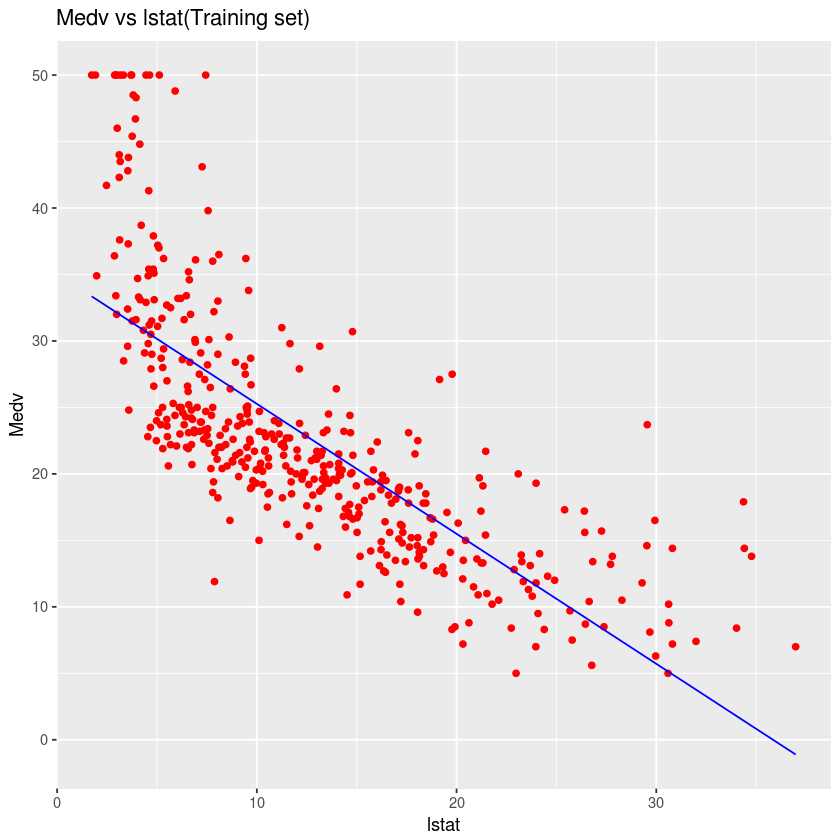

In [5]:
library(ggplot2)
ggplot()+
    geom_point(aes(x = training_set$lstat,y= training_set$medv),
              color='red')+
    geom_line(aes(x = training_set$lstat,y= predict(regressor,new_data=test_set)),
             color='blue')+
    ggtitle('Medv vs lstat(Training set)')+
    xlab('lstat')+
    ylab('Medv')

### Visualizing Results for Test Set

### Inferences
- The statement `lstat       -0.97773    0.04077  -23.98   <2e-16 ***` shows that the `lstat` is highly significant.
- The plot shows that `lstat` is negatively correlated with `medv`. This means that as the lower status of population in the neighbourhood decreases , the value of the houses value increases which is in agreement with our domain knowledge

## Multiple Linear Regression

In [6]:
multipleregressor=lm(formula = medv ~ .,
              data = training_set)
# same as regressor = lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend + State)
summary(multipleregressor)


Call:
lm(formula = medv ~ ., data = training_set)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.7813  -2.6850  -0.5836   2.0282  19.2216 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  32.805148   5.175949   6.338 6.01e-10 ***
crim         -0.095612   0.030802  -3.104 0.002038 ** 
zn            0.038467   0.013650   2.818 0.005060 ** 
indus         0.036196   0.062300   0.581 0.561556    
chas1         2.355246   0.844111   2.790 0.005507 ** 
nox         -18.995909   3.829262  -4.961 1.02e-06 ***
rm            4.691653   0.410706  11.423  < 2e-16 ***
age          -0.008848   0.012772  -0.693 0.488825    
dis          -1.426783   0.199598  -7.148 3.92e-12 ***
rad           0.249007   0.065979   3.774 0.000184 ***
tax          -0.011830   0.003784  -3.126 0.001895 ** 
ptratio      -0.999811   0.131090  -7.627 1.62e-13 ***
b             0.007110   0.002652   2.681 0.007621 ** 
lstat        -0.439822   0.050858  -8.648  < 2e-16 ***
---
S

### Summary
- The lower the `p-value` more is the statistical significance
- 3 Stars is highly statistically significant
- i.e. The independent variable is going to have more impact on the dependent variable
- Usual threshold .5
- From the data it is significant that `crim` `nox` `rm` `dis` `rad` `pratio` and `lstat` are significant while other variables are less significant

### R-squared Error for Simple Linear Regression

In [7]:
summary(regressor)$r.squared 

[1] 0.5710399

### R-squared Error for Multiple Linear Regression

In [8]:
summary(multipleregressor)$r.squared 

[1] 0.7928503

## Logistic Regression

### Dataset Description
**Wisconsin Breast Cancer Database** <br>
- Description: Predict whether a cancer is malignant or benign from biopsy details.<br>
- Type: Binary Classification<br>
- Dimensions: 699 instances, 11 attributes<br>
- Inputs: Integer (Nominal)<br>
- Output: Categorical, 2 class labels<br>
- UCI Machine Learning Repository<br>

### Reading the dataset

In [9]:
# Wisconsin Breast Cancer Database
data(BreastCancer)
dim(BreastCancer)
levels(BreastCancer$Class)
head(BreastCancer)

dataset = as.data.frame(BreastCancer)
dataset = dataset[,2:11]

[1] 699  11

[1] "benign"    "malignant"

Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
1000025,5,1,1,1,2,1,3,1,1,benign
1002945,5,4,4,5,7,10,3,2,1,benign
1015425,3,1,1,1,2,2,3,1,1,benign
1016277,6,8,8,1,3,4,3,7,1,benign
1017023,4,1,1,3,2,1,3,1,1,benign
1017122,8,10,10,8,7,10,9,7,1,malignant


### Encoding the variable

In [10]:
dataset$Class = factor(dataset$Class,
                        level = c('benign','malignant'),
                        labels = c(0,1))
head(dataset)

Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
5,1,1,1,2,1,3,1,1,0
5,4,4,5,7,10,3,2,1,0
3,1,1,1,2,2,3,1,1,0
6,8,8,1,3,4,3,7,1,0
4,1,1,3,2,1,3,1,1,0
8,10,10,8,7,10,9,7,1,1


In [11]:
library(caTools)
set.seed(123)
split = sample.split(dataset$Class, SplitRatio = 0.75)
training_set = subset(dataset, split ==TRUE)
test_set = subset(dataset,split==FALSE)
print("Training Set Dimensions :")
dim(training_set)
print("Testing Set Dimensions :")
dim(test_set)

[1] "Training Set Dimensions :"


[1] 525  10

[1] "Testing Set Dimensions :"


[1] 174  10

In [12]:
classifier = glm(Class ~ .,
                 family = binomial,
                 data = training_set)

Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [13]:
prob_pred = predict(classifier,type='response',newdata = test_set[-10])

In [14]:
y_pred = ifelse(prob_pred > 0.5,1,0)

### Generating the confusion Matrix

In [15]:
cm = table(test_set[,10],y_pred)
cm

   y_pred
      0   1
  0 107   2
  1  12  48

### Accuracy, Error Rate , Precision and Recall

In [16]:
accuracy <- table(y_pred, test_set[,10])
sum(diag(accuracy))/sum(accuracy)

[1] 0.9171598

In [21]:
true_positives = 48
false_positive = 2
false_negatives =12
true_negatives = 107

In [22]:
Precision  = (true_positives)/(true_positives+false_positive)
Precision

[1] 0.96

In [23]:
Recall = (true_positives)/(true_positives+false_negatives)
Recall

[1] 0.8

In [24]:
ErrorRate = (false_positive + false_negatives)/length(test_set[,10])
ErrorRate

[1] 0.08045977